# SVM
- refer to https://www.tensorflow.org/api_docs/python/tf/keras/layers/experimental/RandomFourierFeatures
- RandomFourierFeatures + hinge loss

In [5]:
import sys
import os
project_path = os.path.abspath(os.path.join(os.getcwd(), "../.."))
sys.path.append(project_path)
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models,layers
from tensorflow.keras.layers.experimental import RandomFourierFeatures

from utils.dataset_loader import load_cifar10,structured_data_preprocessing
from utils.trainer import plot_metric
from backbone.cnn import CNN_3L, Sequential_CNN_3L

In [8]:
# 1 Dataset and dataloader
dftrain_raw = pd.read_csv('../../data/titanic/train.csv')
dftest_raw = pd.read_csv('../../data/titanic/test.csv')

x_train = structured_data_preprocessing(dftrain_raw)
y_train = dftrain_raw['Survived'].values
x_test = structured_data_preprocessing(dftest_raw)
y_test = dftest_raw['Survived'].values
print(f"x_train.shape = { x_train.shape} x_test.shape = {x_test.shape}" )

# 2 Model definition
tf.keras.backend.clear_session()
model = keras.Sequential([
  keras.Input(shape=(15,)),
  RandomFourierFeatures(
      output_dim=4096,
      scale=10.,
      kernel_initializer='gaussian'),
  layers.Dense(units=1),
])

# 3 Set optimizer and training
model.compile(
    optimizer='adam',
    loss='hinge',
    metrics=['categorical_accuracy']
)

history = model.fit(x_train , y_train, epochs=30,
                    validation_split=0.2 )  # Split part of the training data for validation
model.summary()

# 4 Model evaluation, application and saving

x_train.shape = (712, 15) x_test.shape = (179, 15)
Epoch 1/30
18/18 [==============================] - 0s 16ms/step - loss: 1.0293 - categorical_accuracy: 1.0000 - val_loss: 1.0398 - val_categorical_accuracy: 1.0000
Epoch 2/30
18/18 [==============================] - 0s 3ms/step - loss: 0.6978 - categorical_accuracy: 1.0000 - val_loss: 0.7976 - val_categorical_accuracy: 1.0000
Epoch 3/30
18/18 [==============================] - 0s 3ms/step - loss: 0.6337 - categorical_accuracy: 1.0000 - val_loss: 0.7213 - val_categorical_accuracy: 1.0000
Epoch 4/30
18/18 [==============================] - 0s 3ms/step - loss: 0.5875 - categorical_accuracy: 1.0000 - val_loss: 0.6893 - val_categorical_accuracy: 1.0000
Epoch 5/30
18/18 [==============================] - 0s 3ms/step - loss: 0.5662 - categorical_accuracy: 1.0000 - val_loss: 0.7445 - val_categorical_accuracy: 1.0000
Epoch 6/30
18/18 [==============================] - 0s 3ms/step - loss: 0.5329 - categorical_accuracy: 1.0000 - val_loss: 0.6817

In [9]:
## 4.1 Model evaluate 
model.evaluate(x = x_test,y = y_test)  # Val_loss,val_accuracy

## 4.2 Model application
model.predict(x_test[0:10])  # Predict the possiblities
model.predict_classes(x_test[0:10])  #Predict the classes


6/6 [==============================] - 0s 2ms/step - loss: 0.5292 - categorical_accuracy: 1.0000
Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([[0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0]], dtype=int32)

In [10]:
## 4.3 Model saving
model.save('../../model_saved/structured_data_keras_model.model') 
del model  #Deleting current model
model = models.load_model('../../model_saved/structured_data_keras_model.model')

# Could also model.to_json/models.model_from_json to save structure
# Could also model.save_weights, and save ckpt in save_format = "tf"

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: ../../model_saved/structured_data_keras_model.model/assets


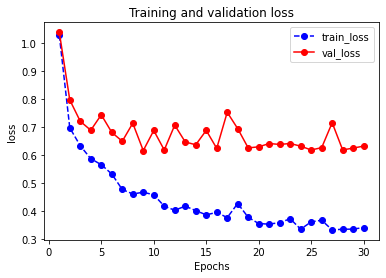

In [11]:
# 4 Model evaluation, application and saving
plot_metric(history,"loss")

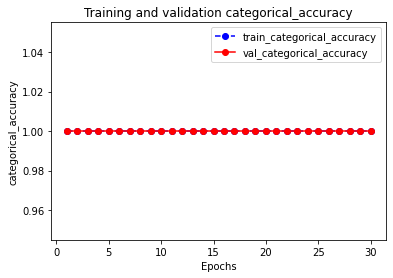

In [13]:
plot_metric(history,"categorical_accuracy")